In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


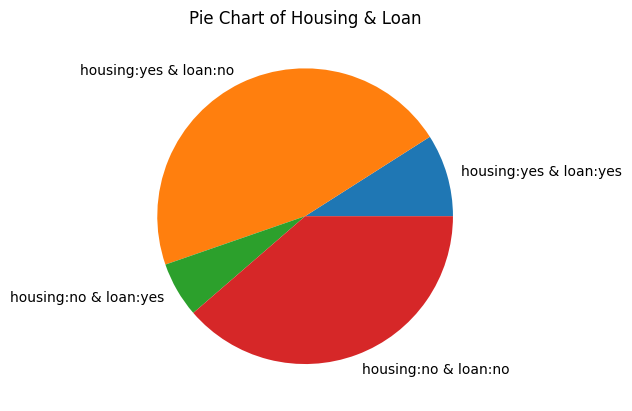

In [3]:
count1 = ((df['housing'] == 'yes') & (df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts()[True]
count2 = ((df['housing'] == 'yes') & (df['loan'] == 'no') & (df['y'] == 'yes')).value_counts()[True]
count3 = ((df['housing'] == 'no') & (df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts()[True]
count4 = ((df['housing'] == 'no') & (df['loan'] == 'no') & (df['y'] == 'yes')).value_counts()[True]

numbers = [count1, count2, count3, count4]
labels = ['housing:yes & loan:yes', 'housing:yes & loan:no', 'housing:no & loan:yes', 'housing:no & loan:no']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Housing & Loan')
plt.show()

# Conclusion: Loan is a bigger deteminer than housing for customers that subscribe.
# Conclusion: The bank should target customers without loans.

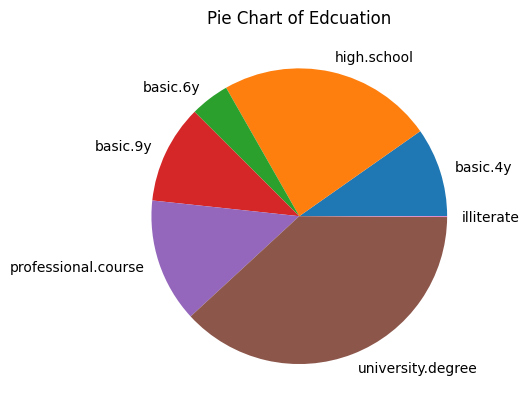

In [4]:
educ = df['education'].unique()

count1 = ((df['education'] == 'basic.4y') & (df['y'] == 'yes')).value_counts()[True]
count2 = ((df['education'] == 'high.school') & (df['y'] == 'yes')).value_counts()[True]
count3 = ((df['education'] == 'basic.6y') & (df['y'] == 'yes')).value_counts()[True]
count4 = ((df['education'] == 'basic.9y') & (df['y'] == 'yes')).value_counts()[True]
count5 = ((df['education'] == 'professional.course') & (df['y'] == 'yes')).value_counts()[True]
count6 = ((df['education'] == 'university.degree') & (df['y'] == 'yes')).value_counts()[True]
count7 = ((df['education'] == 'illiterate') & (df['y'] == 'yes')).value_counts()[True]

numbers = [count1, count2, count3, count4, count5, count6, count7]
labels = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'illiterate']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Edcuation')
plt.show()

# Conclusion: University Degrees have the most customers that are subscribed
# Conclusion: The bank should target high school and university degree (intuitively makes sense)

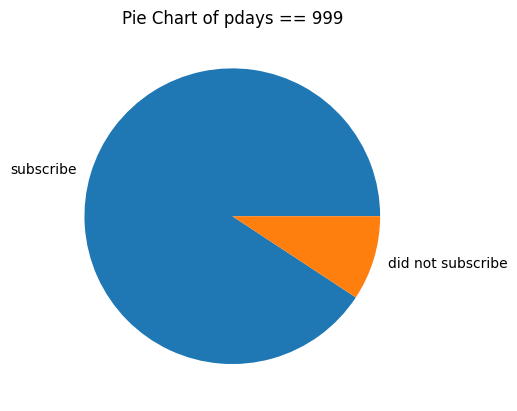

In [13]:
pdays = df['pdays'].unique()
count1 = ((df['pdays'] == 999) & (df['y'] != 'yes')).value_counts()[True]
count2 = ((df['pdays'] == 999) & (df['y'] != 'no')).value_counts()[True]

numbers = [count1, count2]
labels = ['subscribe', 'did not subscribe']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of pdays == 999')
plt.show()

# Conclusion: Vast majority of customers that have 999 pdays subscribed
# Conclusion: Seems like customers that haven't been contacted are more likely to subscribe

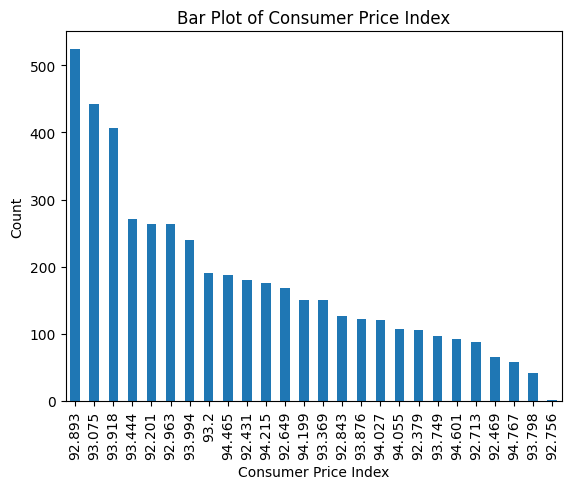

In [23]:
# consumer price index
subscribed_df = df.loc[(df['y'] == 'yes')]
cons_price_idx = subscribed_df['cons.price.idx'].value_counts()
cons_price_idx.plot.bar()
plt.xlabel('Consumer Price Index')
plt.ylabel('Count')
plt.title('Bar Plot of Consumer Price Index')
plt.show()

# Conclusion: Target customers with high CPI (non-volatile trend)

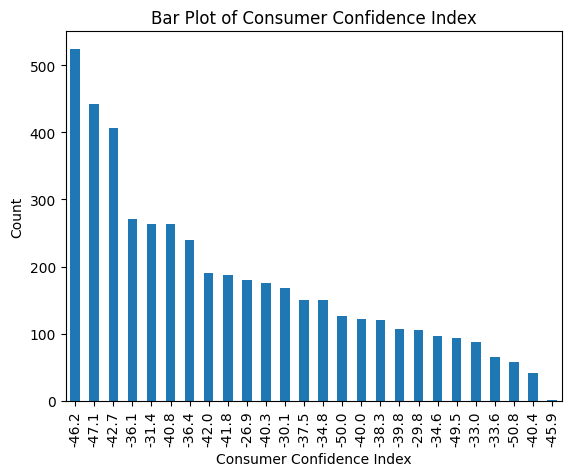

In [22]:
# consumer confidence index
subscribed_df = df.loc[(df['y'] == 'yes')]
cons_conf_idx = subscribed_df['cons.conf.idx'].value_counts()
cons_conf_idx.plot.bar()
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Count')
plt.title('Bar Plot of Consumer Confidence Index')
plt.show()

# Conclusion: Target customers with lower CCI (non-volatile trend)

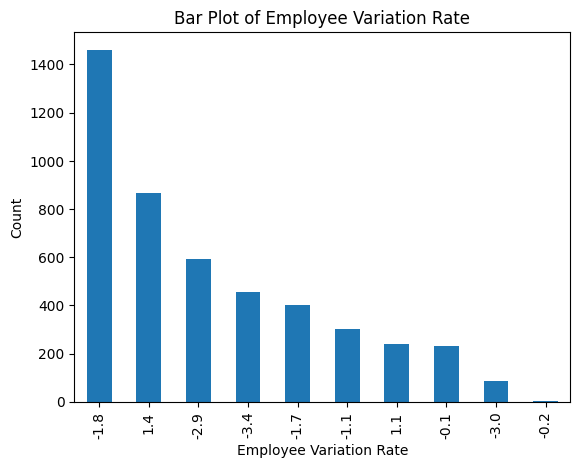

In [24]:
# employee variation rate
subscribed_df = df.loc[(df['y'] == 'yes')]
emp_var_rate = subscribed_df['emp.var.rate'].value_counts()
emp_var_rate.plot.bar()
plt.xlabel('Employee Variation Rate')
plt.ylabel('Count')
plt.title('Bar Plot of Employee Variation Rate')
plt.show()

# Conclusion: Target customers with lower EVR (non-volatile trend)